## Prepare : 
1. Where is your data located ?
    > on the following website : https://divvy-tripdata.s3.amazonaws.com/index.html
1. how is the data organized ?
> in different csv where one csv represent one month

1. Does your data ROCCC?
> yes, data answer correctly to the ROCCC conditions

1. How are you addressing licensing, privacy, security, and accessibility?
> 
1.  How did you verify the data’s integrity?
> I checked missing values thanks to seaborn library
1. How does it help you answer your question?
> I avoid bias by cleaning datas
1. Are there any problems with the data?
> There are some missing values that can be completed that representent only a  minority of the dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

In [44]:
# check the csv format
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.read_csv('data/202102-divvy-tripdata.csv').head(20)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member
1,0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual
2,E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member
3,B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member
4,83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member
5,BDAA7E3494E8D545,electric_bike,2021-02-24 15:43:33,2021-02-24 15:49:05,Fairbanks St & Superior St,18003,LaSalle Dr & Huron St,KP1705001026,41.895808,-87.620253,41.894886,-87.631979,casual
6,A772742351171257,classic_bike,2021-02-01 17:47:42,2021-02-01 17:48:33,LaSalle Dr & Huron St,KP1705001026,LaSalle Dr & Huron St,KP1705001026,41.894877,-87.632326,41.894877,-87.632326,casual
7,295476889D9B79F8,classic_bike,2021-02-11 18:33:53,2021-02-11 18:35:09,Fairbanks St & Superior St,18003,Fairbanks St & Superior St,18003,41.895748,-87.620104,41.895748,-87.620104,member
8,362087194BA4CC9A,classic_bike,2021-02-27 15:13:39,2021-02-27 15:36:36,LaSalle Dr & Huron St,KP1705001026,LaSalle Dr & Huron St,KP1705001026,41.894877,-87.632326,41.894877,-87.632326,member
9,21630F715038CCB0,classic_bike,2021-02-20 08:59:42,2021-02-20 09:17:04,LaSalle Dr & Huron St,KP1705001026,LaSalle Dr & Huron St,KP1705001026,41.894877,-87.632326,41.894877,-87.632326,member


In [3]:
# put file names into a list
files_names = []
for i in range(2,13):
    files_names.append(f'data/2021{str(i).zfill(2)}-divvy-tripdata.csv')

In [4]:
# add the last file name (2022) into the list
files_names.append("data/202201-divvy-tripdata.csv")

In [5]:
# check if the list of name is correct
files_names

['data/202102-divvy-tripdata.csv',
 'data/202103-divvy-tripdata.csv',
 'data/202104-divvy-tripdata.csv',
 'data/202105-divvy-tripdata.csv',
 'data/202106-divvy-tripdata.csv',
 'data/202107-divvy-tripdata.csv',
 'data/202108-divvy-tripdata.csv',
 'data/202109-divvy-tripdata.csv',
 'data/202110-divvy-tripdata.csv',
 'data/202111-divvy-tripdata.csv',
 'data/202112-divvy-tripdata.csv',
 'data/202201-divvy-tripdata.csv']

In [6]:
# read all files_names as df
df_list = []
for file in files_names:
    df_list.append(pd.read_csv(file))  

In [7]:
# joining list of dataframes into a single one - ignore_index allows to not reset the index during the merge
merged_df = pd.concat(df_list,ignore_index=True)

In [8]:
# recup all the Dtype 
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5601999 entries, 0 to 5601998
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 555.6+ MB


In [9]:
# description that allows me to get different numerical values 
# Std / min / max ...
merged_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,start_lat,start_lng,end_lat,end_lng
count,5601999.00000,5601999.00000,5597245.00000,5597245.00000
mean,41.90100,-87.64609,41.90127,-87.64631
std,0.04614,0.02939,0.04622,0.02898
min,41.64000,-87.84000,41.39000,-88.97000
25%,41.88137,-87.66000,41.88170,-87.66014
50%,41.89897,-87.64182,41.89964,-87.64275
75%,41.92906,-87.62773,41.92914,-87.62775
max,45.63503,-73.79648,42.16812,-87.49000


<Figure size 720x432 with 0 Axes>

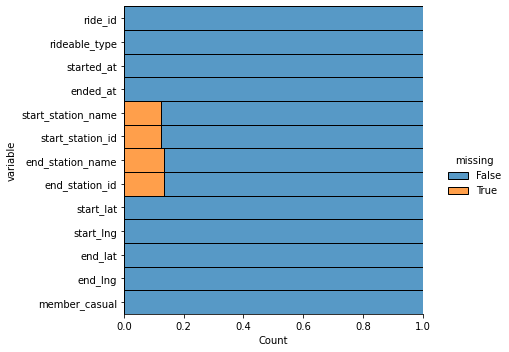

In [10]:
# make a visualization that allows me to know where are the missing values on the dataset

plt.figure(figsize=(10,6))
sns.displot(
    data=merged_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

C:\Users\clmen\OneDrive\Bureau\PROJET\Case_Study_Bike\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='start_lat', ylabel='Density'>

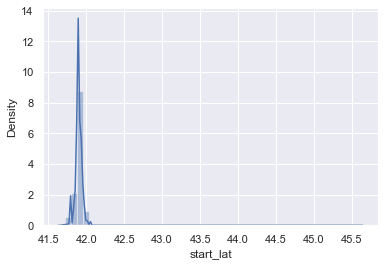

In [11]:
# Distribution or Density of the "start_lat"
sns.set(style = 'darkgrid')
sns.distplot(merged_df['start_lat'])

In [12]:
# According to the dataset, ride_id must be in 16 values format
merged_df['ride_id'].head().str.len()

0    16
1    16
2    16
3    16
4    16
Name: ride_id, dtype: int64

In [13]:
# check of the format for the "ride_id"
merged_df['ride_id_lengths'] = merged_df['ride_id'].astype(str).map(len) == 16

In [14]:
# True or False check
merged_df['ride_id_lengths'].head()


0    True
1    True
2    True
3    True
4    True
Name: ride_id_lengths, dtype: bool

<AxesSubplot:xlabel='ride_id_lengths', ylabel='count'>

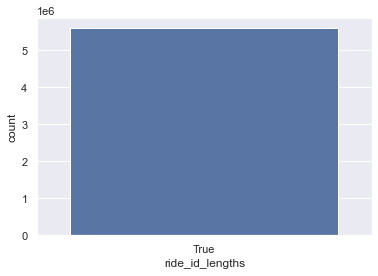

In [15]:
# Plot that represent true or false values for ride_id_length function
sns.countplot(x="ride_id_lengths", data=merged_df)

## Process : 
1. What tools are you choosing and why ?
    > To check errors or missing values I use the seaborn libary
    > different functions and plots to illustrate what we are cleaning

1. Have you ensured your data's integrity?
    > Yes I did, thanks to Excel sorting + seaborn / panda / matplotlib. 

1. What steps have you taken to ensure that your data is clean?
    > Loading data - Check data integrity - Check data format
1. How can you verify that your data is clean and ready to analyze?
    > Thanks to different plot like the last one : sns.countplot(x="ride_id_lengths", data=merged_df)
1.  Have you documented your cleaning process so you can review and share those results?
    > Yes I did


In [16]:
merged_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_id_lengths
0,89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member,True
1,0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual,True
2,E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member,True
3,B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member,True
4,83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member,True


In [17]:
# Check the Dtype of start_at and ended_at
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5601999 entries, 0 to 5601998
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_id_lengths     bool   
dtypes: bool(1), float64(4), object(9)
memory usage: 561.0+ MB


In [18]:
# Translate the type into datetime to calculate it after
merged_df['started_at'] =  pd.to_datetime(merged_df['started_at'], format='%Y-%m-%d %H:%M:%S')
merged_df['ended_at'] =  pd.to_datetime(merged_df['ended_at'], format='%Y-%m-%d %H:%M:%S')

In [19]:
# Calculate the time of the ride 
merged_df["ride_length"] = merged_df['ended_at'] - merged_df['started_at']

In [20]:
merged_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_id_lengths,ride_length
0,89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member,True,0 days 00:06:47
1,0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual,True,0 days 00:19:31
2,E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member,True,0 days 00:08:52
3,B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member,True,0 days 00:04:25
4,83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member,True,0 days 00:15:14


In [21]:
# Check the max value of the ride (the longest ride)
column = merged_df["ride_length"]
max_value = column.max()
print (max_value)

38 days 20:24:09


In [22]:
# Test sort()
merged_df.sort_values(by=['ride_length'])['ride_length'].tail(20)


1274061   25 days 09:02:09
1577850   26 days 16:18:36
1990931   26 days 20:45:16
1691230   27 days 00:42:55
330965    27 days 01:23:05
1416257   27 days 09:19:09
1981685   27 days 11:47:11
1691343   28 days 00:00:34
2310370   28 days 00:21:15
4620039   28 days 06:25:01
2207966   28 days 06:44:36
2891697   28 days 21:49:10
1892610   28 days 22:05:31
1693875   32 days 15:30:51
288165    33 days 04:16:42
2516922   34 days 02:27:09
1228694   36 days 14:21:23
661669    37 days 10:41:36
1692457   38 days 16:11:41
1742664   38 days 20:24:09
Name: ride_length, dtype: timedelta64[ns]

In [23]:
# Calcul of the mean 'ride_length'
merged_df['ride_length'].mean()

Timedelta('0 days 00:21:55.620539917')

In [24]:
# We can conclud that there is more member than casual
merged_df['member_casual'].mode()


0    member
Name: member_casual, dtype: object

In [45]:
# translation from date format to day of the week name format
merged_df['started_at'].head(20).dt.day_name()

0        Friday
1        Sunday
2       Tuesday
3       Tuesday
4       Tuesday
5     Wednesday
6        Monday
7      Thursday
8      Saturday
9      Saturday
10     Saturday
11     Saturday
12     Thursday
13       Friday
14     Saturday
15       Friday
16     Thursday
17     Saturday
18      Tuesday
19      Tuesday
Name: started_at, dtype: object

In [26]:
# add the new column ['started_at_day']
merged_df['started_at_day'] = merged_df['started_at'].dt.day_name()

In [27]:
# most occuring value
merged_df['started_at_day'].mode()

0    Saturday
Name: started_at_day, dtype: object

In [28]:
# occurence of each day
merged_df['started_at_day'].value_counts()

Saturday     989494
Sunday       857058
Friday       808836
Wednesday    758014
Tuesday      743603
Thursday     739826
Monday       705168
Name: started_at_day, dtype: int64

In [29]:
# compare averages between casual and member (like a pivot table)
average_ride_length = merged_df.groupby('member_casual', as_index=False)['ride_length'].mean()

In [30]:
# reduce the precision of the ride_length in s 
average_ride_length['ride_length'] = average_ride_length['ride_length'].round('s')

In [31]:
# average of the ride length per tpe of member
average_ride_length

,member_casual,ride_length
0,casual,0 days 00:32:02
1,member,0 days 00:13:36


In [32]:
# new column that illustrate the ride_length per the day and the type of member (like a pivot table comparaison)
pivot_table_member_and_day = merged_df.groupby(['started_at_day','member_casual'], as_index=False)['ride_length'].mean()

In [33]:
# rounding in secondes
pivot_table_member_and_day['ride_length'] = pivot_table_member_and_day['ride_length'].round('s')

In [34]:
pivot_table_member_and_day

,started_at_day,member_casual,ride_length
0,Friday,casual,0 days 00:30:22
1,Friday,member,0 days 00:13:19
2,Monday,casual,0 days 00:31:56
3,Monday,member,0 days 00:13:11
4,Saturday,casual,0 days 00:34:45
5,Saturday,member,0 days 00:15:14
6,Sunday,casual,0 days 00:37:33
7,Sunday,member,0 days 00:15:39
8,Thursday,casual,0 days 00:27:49
9,Thursday,member,0 days 00:12:45


In [35]:
# count the different type of ride per type of member
pivot_table_member_ride_type = merged_df.groupby('member_casual', as_index=False)['rideable_type'].value_counts()

In [36]:
#  illustration of the count the different type of ride per type of member
pivot_table_member_ride_type

,member_casual,rideable_type,count
0,casual,classic_bike,1265372
1,casual,electric_bike,952838
2,casual,docked_bike,311198
3,member,classic_bike,1979023
4,member,electric_bike,1093568


In [37]:
merged_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_id_lengths,ride_length,started_at_day
0,89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member,True,0 days 00:06:47,Friday
1,0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual,True,0 days 00:19:31,Sunday
2,E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member,True,0 days 00:08:52,Tuesday
3,B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member,True,0 days 00:04:25,Tuesday
4,83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member,True,0 days 00:15:14,Tuesday


In [38]:
# get count of rides group by days of the week
merged_df['started_at_day'].value_counts()

Saturday     989494
Sunday       857058
Friday       808836
Wednesday    758014
Tuesday      743603
Thursday     739826
Monday       705168
Name: started_at_day, dtype: int64

<AxesSubplot:xlabel='started_at_day', ylabel='count'>

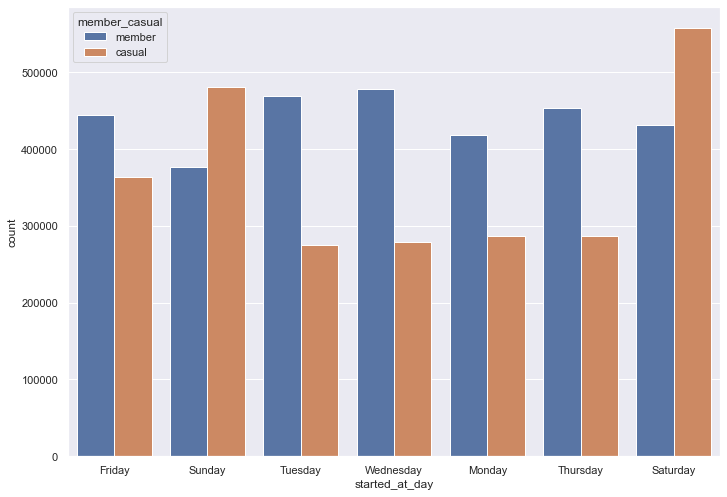

In [39]:
# Count of rides group by days of the week and type of member (casual or member)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="started_at_day", hue="member_casual", data=merged_df)


In [40]:
# convert ride_length into minutes and create a new column "ride_length_minute"
merged_df["ride_length_minute"] = merged_df['ride_length'] / np.timedelta64(1, 'm') 


In [41]:
# group by member_casual and a group by start_at_day (check graph above
X = merged_df.groupby(by=["member_casual", "started_at_day"], dropna=False).mean()['ride_length_minute']

In [42]:
X

member_casual  started_at_day
casual         Friday            30.366576
               Monday            31.926110
               Saturday          34.749375
               Sunday            37.553109
               Thursday          27.821692
               Tuesday           27.935986
               Wednesday         27.745127
member         Friday            13.317666
               Monday            13.190951
               Saturday          15.240294
               Sunday            15.648421
               Thursday          12.754084
               Tuesday           12.785714
               Wednesday         12.771486
Name: ride_length_minute, dtype: float64

<AxesSubplot:xlabel='started_at_day', ylabel='ride_length_minute'>

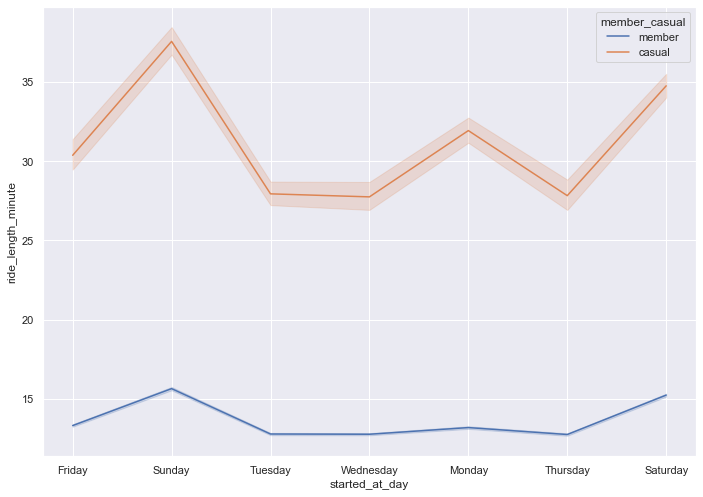

In [43]:
# Graph that represents the average of ride_length in minute for the member and the casual.We can see that member's rides are shorter than the casual's rides.
sns.lineplot(data=merged_df, x="started_at_day",y="ride_length_minute", hue="member_casual", estimator='mean')